#HR ANALYTICS PROMOTION PREDICTION USING LOGISTIC REGRESSION

>Importing the required libraries


In [71]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.pylab import rcParams
from sklearn.metrics import r2_score
from sklearn import metrics

##DATA SET ANALYSIS






>Reading data usinf read_csv function of pandas library

In [13]:
df = pd.read_csv("dataset.csv")

>displaying a sample of contents of the dataset

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


>More dataset analysis 

In [8]:
df.shape

(14999, 10)

In [6]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


>Time for some visual analysis of data

>Here's a link for changing cmap from seaborn visualize as you like
https://seaborn.pydata.org/tutorial/color_palettes.html

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

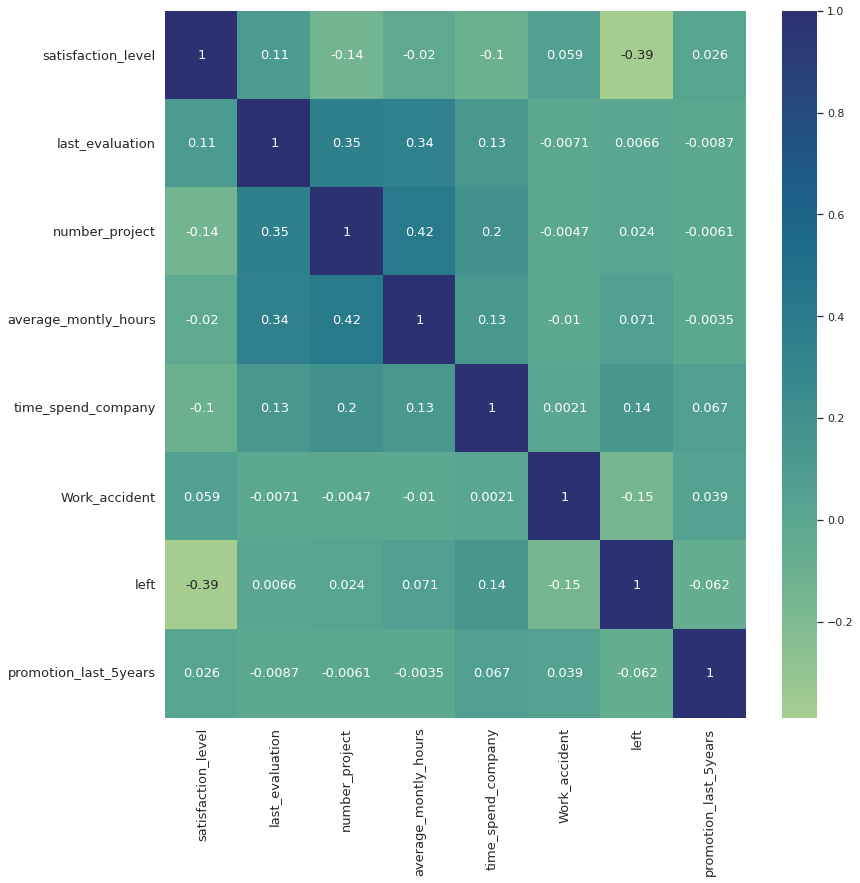

In [56]:
sns.set(font_scale=13)
sns.set(rc = {'figure.figsize':(13,13)})
a=sns.heatmap(df.corr(),annot=True,annot_kws={'size':13},cmap="crest")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

##DATA PREPROCESSING

Since we are going to predict whether a person got promoted or not in the last 5 years, we will be ignoring features like salary and department

>Dropping the unecessary columns

In [14]:
df = df.drop("Department",axis=1)
df = df.drop("salary",axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


>Crosschecking the shape of the dataset after dropping

In [16]:
df.shape


(14999, 8)

>Ok now its time for feature selection

>>so our dependent variable will be promotion_last_5years and everything else independent variables

In [26]:
x=list(df.columns)
x.remove("promotion_last_5years")
x=df[x]
y=df["promotion_last_5years"]

>K its now time for splitting our dataset into train and test

In [59]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

##MODEL

>So we will be using the logistic regression model for prediction 

>A small note on Logistic regression coming up

>K so logistic regression is a type of regression model in which we are fitting the data into a sigmoid function instead of a linear function as we did in linear regression 

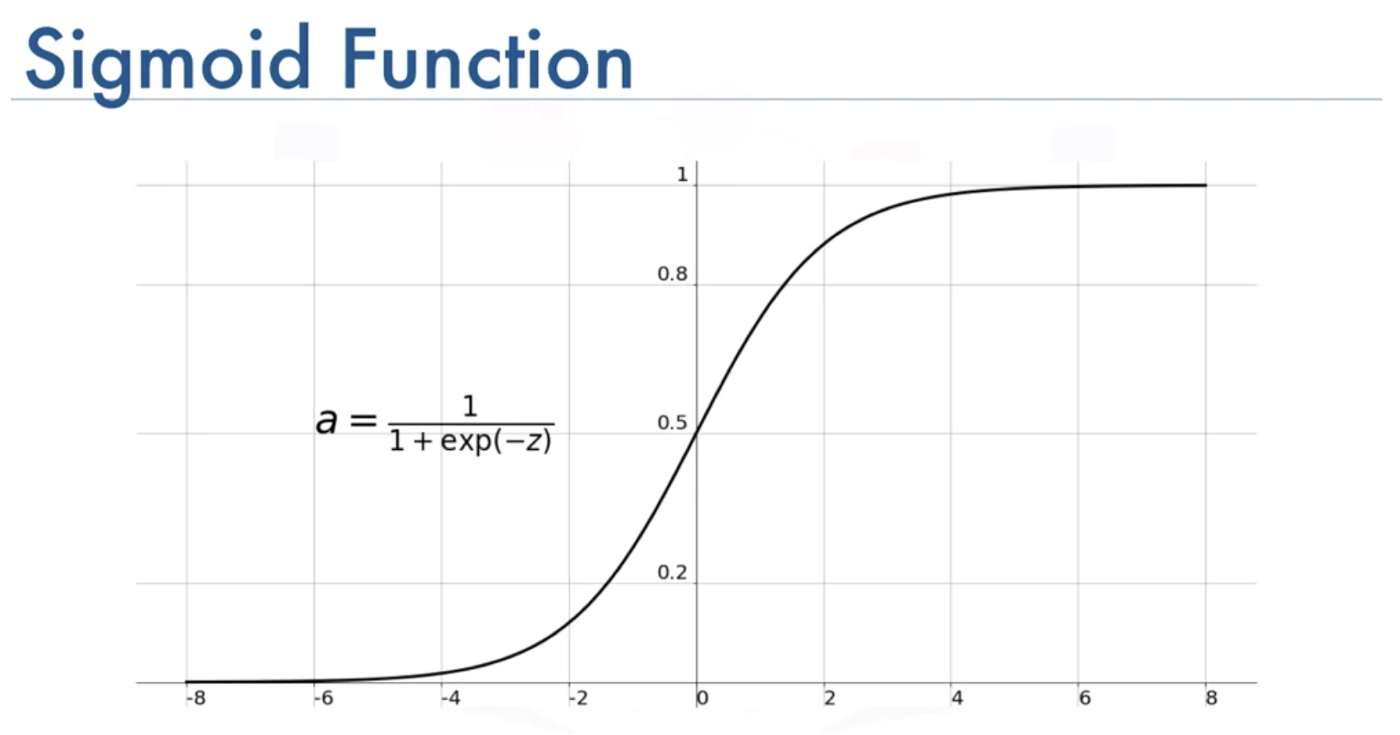

>So what we are doing is that for linear regression the function was $y_{x}=mx+c$

>But when it comes to logistic regression the function will be

>$y_{x}=\frac{1}{1+e^{(mx+c)}}$ 


>Lets make a logistic regression object with the help of LogisticRegression function that is imported and we are fitting the data

In [60]:
Lg = LogisticRegression()
Lg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

>ok now im printing the logistic regression probability of the model

In [61]:
Lg.predict_proba(X_test)

array([[0.97826952, 0.02173048],
       [0.98154607, 0.01845393],
       [0.98330431, 0.01669569],
       ...,
       [0.97591435, 0.02408565],
       [0.99214363, 0.00785637],
       [0.99422514, 0.00577486]])

>lets see the score of our model

In [69]:
predict = Lg.predict(X_test)
print(Lg.score(X_test,y_test)*100)

98.1010101010101


>98 seems like a pretty descent score

>So lets conclude our prediction by drawing a confusion matrix also

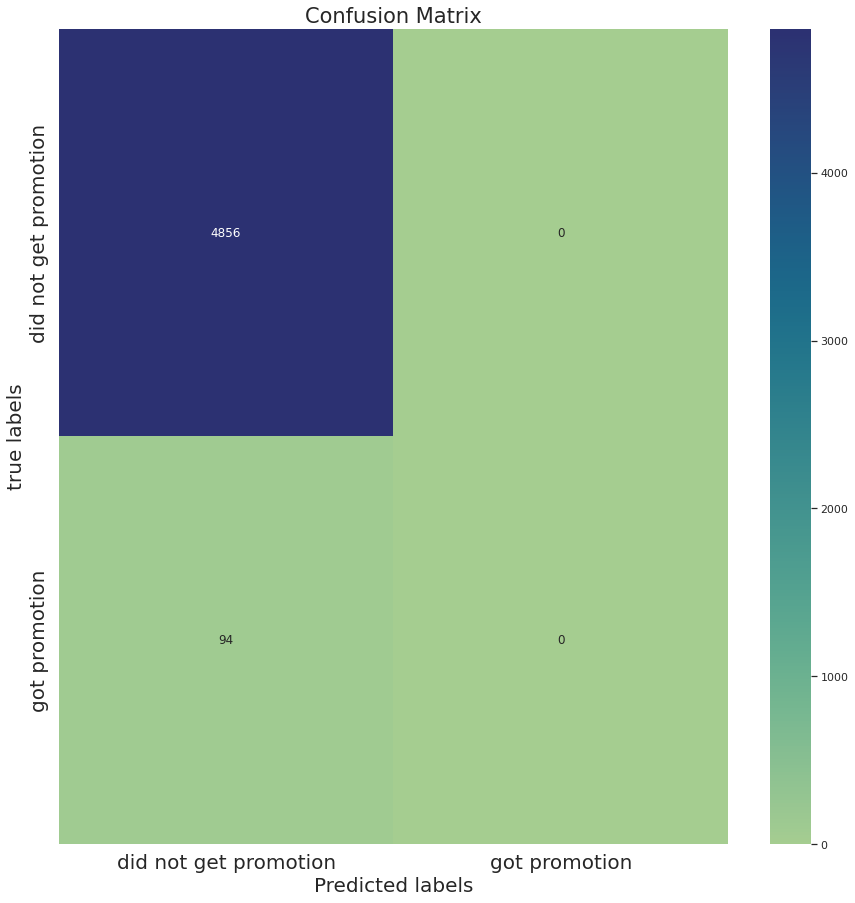

In [88]:
confusion_matrix = metrics.confusion_matrix(y_test, predict)
ax = plt.subplot()
sns.set(font_scale=20.0) 
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="crest", fmt="g");  
label_font = {'size':'20'} 
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('true labels', fontdict=label_font);
title_font = {'size':'21'}  
ax.set_title('Confusion Matrix', fontdict=title_font);
ax.tick_params(axis='both', which='major', labelsize=20) 
ax.xaxis.set_ticklabels(['did not get promotion', 'got promotion']);
ax.yaxis.set_ticklabels(['did not get promotion', 'got promotion']);
plt.show()